In [1]:
import requests 
import pandas as pd
import numpy as np
import math
import os 
from statistics import mean, median, mode
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
MAX_RECORDS = 200
latmin = 43.6406
latmax = 43.736439
lngmax = -79.252357       
lngmin = -79.549301
records = 2000
x = 2000
records_per_page = min(records, MAX_RECORDS)
pages = math.ceil(records / MAX_RECORDS)

maindf = pd.DataFrame({"Address":''},index=[np.arange(0, records)])
maindf["Latitude"]=""
maindf["Longitude"]=""
maindf["Sale_Price"]= ""    
maindf['Mls Number']=""

for page in np.arange(pages):
    url = 'https://api2.realtor.ca/Listing.svc/PropertySearch_Post'
    body = {
        "CultureId":1,
        "ApplicationId":1,
        "PropertySearchTypeId":1,
        "TransactionTypeID":2,
        "BuildingTypeId":0,
        "LongitudeMin":f'{lngmin}',
        "LongitudeMax":f'{lngmax}',
        "LatitudeMin":f'{latmin}',
        "LatitudeMax":f'{latmax}',
        "PriceMin":400000,
        "RecordsPerPage": records_per_page,
        "CurrentPage": page + 1
    }

    response = requests.post(url, data=body).json() 
    
    for index, mls_post in enumerate(response['Results']):
        if page > 0:
            index += (MAX_RECORDS * x)
            
        try:                        
            lng = float(mls_post['Property']['Address']['Longitude'])
            address = mls_post['Property']['Address']
    
            if (lng >= lngmin and lng <= lngmax and address['AddressText'] not in maindf['Address'].unique()):
                maindf.loc[index, "Latitude"] = address['Latitude']  
                maindf.loc[index, "Longitude"] = address['Longitude']
                maindf.loc[index,"Address"] = address['AddressText']        
                maindf.loc[index,"Mls Number"]= mls_post['MlsNumber']
                    
                try:
                    maindf.loc[index,"Sale_Price"] = mls_post['Property']['Price']
                except:
                    maindf.loc[index,"Sale_Price"] = ""     
                
        except Exception as e:
            print('Error ', e)  
            
maindfclean = maindf.loc[maindf['Address']!="",:]


In [3]:
maindfclean[maindfclean['Address'] == ""]
maindfclean['Address'].count()

399

In [4]:
maindfclean = maindf.loc[maindf['Address']!="",:]
maindfclean.set_index('Mls Number')

,Address,Latitude,Longitude,Sale_Price
Mls Number,,,,
C4626883,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,"$405,000"
C4601721,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,"$409,000"
W4477656,"#2007 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,"$409,000"
30742356,"2007 - 10 MARTHA EATON Way|Toronto, Ontario M...",43.697053,-79.489799,"$409,000"
W4618471,"#711 -236 ALBION RD|Toronto, Ontario M9W6A6",43.7220286,-79.5437092,"$409,000"
W4629691,"#PH 4 -2130 WESTON RD|Toronto, Ontario M9N3R9",43.7024619,-79.5246821,"$415,000"
W4597587,"#1403 -238 ALBION RD|Toronto, Ontario M9W6A7",43.7230155,-79.5436818,"$418,000"
C4620975,"#317 -120 DALLIMORE CIRC|Toronto, Ontario M3C4J1",43.7302124,-79.3320772,"$418,000"
W4628474,"#1012 -360 RIDELLE AVE|Toronto, Ontario M6B1K1",43.704839,-79.4399294,"$419,000"


In [5]:
maindfclean.count()

Address       399
Latitude      399
Longitude     399
Sale_Price    399
Mls Number    399
dtype: int64

In [6]:
mls_post

{'Id': '21223450',
 'MlsNumber': 'C4601519',
 'PublicRemarks': 'Welcome To Suite 808 At 181 Davenport. A Custom One Of A Kind In A Boutique Building Of Only 68 Units W/ 5 Star World Class Services & Amenities In The Heart Of Yorkville,W/ 24 Hr Concierge, Valet Parking.Enjoy Aprox 1600 Sqftof Living Space W/ The Finest Finishes In A Spacious Open Concept Custom Floor Plan W/ Endless Upgrades. Walking Distance To Everything Including The Best Shopping & Dining In The City. Oversized Master W/ 5Pc Ensuite & 2 Walk-In Closets**** EXTRAS **** Miele Appl\'s Including Gas Stove & 36"" Fridge.Upgrded Custom Light Fixtures & Window Coverings.Stone Counters In Kitchen & All Bathrooms.A Custom Pantry In Kitchen & Upgraded Trim Work Th/Out. 9\' Ceilings. 2nd Parking Spot Available (25824969)',
 'Building': {'BathroomTotal': '3',
  'Bedrooms': '2',
  'Type': 'Apartment',
  'Ammenities': 'Storage - Locker, Car Wash, Security/Concierge, Exercise Centre'},
 'Individual': [{'IndividualID': 2005620,
   

In [7]:
maindfclean.Address

0         #307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6
1             #901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6
2         #2007 -10 MARTHA EATON WAY|Toronto, Ontario M6...
3         2007 -  10 MARTHA EATON Way|Toronto, Ontario M...
4               #711 -236 ALBION RD|Toronto, Ontario M9W6A6
5             #PH 4 -2130 WESTON RD|Toronto, Ontario M9N3R9
6              #1403 -238 ALBION RD|Toronto, Ontario M9W6A7
7          #317 -120 DALLIMORE CIRC|Toronto, Ontario M3C4J1
8            #1012 -360 RIDELLE AVE|Toronto, Ontario M6B1K1
9           #112 -812 LANSDOWNE AVE|Toronto, Ontario M6H4K5
10         #1111 -1 HICKORY TREE RD|Toronto, Ontario M9N3W4
11           #508 -2603 BATHURST ST|Toronto, Ontario M6B2Z6
12         #1417 -10 EDGECLIFF GFWY|Toronto, Ontario M3C3A3
13             #110 -15 LA ROSE AVE|Toronto, Ontario M9P1A7
14               #605 -78 WARREN RD|Toronto, Ontario M4V2R6
15            #207 -270 SCARLETT RD|Toronto, Ontario M6N4X7
16               #630 -36 LISGAR ST|Toro

In [8]:
maindfclean['Sale_Price'] = maindfclean['Sale_Price'].str[1:]
maindfclean

C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Address,Latitude,Longitude,Sale_Price,Mls Number
0,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,"405,000",C4626883
1,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,"409,000",C4601721
2,"#2007 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,"409,000",W4477656
3,"2007 - 10 MARTHA EATON Way|Toronto, Ontario M...",43.697053,-79.489799,"409,000",30742356
4,"#711 -236 ALBION RD|Toronto, Ontario M9W6A6",43.7220286,-79.5437092,"409,000",W4618471
5,"#PH 4 -2130 WESTON RD|Toronto, Ontario M9N3R9",43.7024619,-79.5246821,"415,000",W4629691
6,"#1403 -238 ALBION RD|Toronto, Ontario M9W6A7",43.7230155,-79.5436818,"418,000",W4597587
7,"#317 -120 DALLIMORE CIRC|Toronto, Ontario M3C4J1",43.7302124,-79.3320772,"418,000",C4620975
8,"#1012 -360 RIDELLE AVE|Toronto, Ontario M6B1K1",43.704839,-79.4399294,"419,000",W4628474
9,"#112 -812 LANSDOWNE AVE|Toronto, Ontario M6H4K5",43.665271,-79.4476835,"419,000",W4627142


In [9]:
maindfclean['Postal_Code']=maindfclean['Address'].str[-6:]
maindfclean['Postal code prefix']=maindfclean['Postal_Code'].str[:3]
maindfclean

C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Address,Latitude,Longitude,Sale_Price,Mls Number,Postal_Code,Postal code prefix
0,"#307 -55 REGENT PARK BLVD|Toronto, Ontario M5A3H6",43.6594307,-79.361023,"405,000",C4626883,M5A3H6,M5A
1,"#901 -200 DUNDAS ST E|Toronto, Ontario M5A4R6",43.6573757,-79.3740982,"409,000",C4601721,M5A4R6,M5A
2,"#2007 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,"409,000",W4477656,M6M5B3,M6M
3,"2007 - 10 MARTHA EATON Way|Toronto, Ontario M...",43.697053,-79.489799,"409,000",30742356,M6M5B3,M6M
4,"#711 -236 ALBION RD|Toronto, Ontario M9W6A6",43.7220286,-79.5437092,"409,000",W4618471,M9W6A6,M9W
5,"#PH 4 -2130 WESTON RD|Toronto, Ontario M9N3R9",43.7024619,-79.5246821,"415,000",W4629691,M9N3R9,M9N
6,"#1403 -238 ALBION RD|Toronto, Ontario M9W6A7",43.7230155,-79.5436818,"418,000",W4597587,M9W6A7,M9W
7,"#317 -120 DALLIMORE CIRC|Toronto, Ontario M3C4J1",43.7302124,-79.3320772,"418,000",C4620975,M3C4J1,M3C
8,"#1012 -360 RIDELLE AVE|Toronto, Ontario M6B1K1",43.704839,-79.4399294,"419,000",W4628474,M6B1K1,M6B
9,"#112 -812 LANSDOWNE AVE|Toronto, Ontario M6H4K5",43.665271,-79.4476835,"419,000",W4627142,M6H4K5,M6H


In [10]:
cwd = os.getcwd()
print (cwd)
csvpath_one = "Postal code GTA.csv"
PostalCode_df = pd.read_csv(csvpath_one)
PostalCode_df.head()

C:\Users\pasqu\OneDrive\Documents\Hot-Hotter-Hottest\Pasquale


,Area,Postal code prefix
0,Hamilton-Stoney Creek,L8E
1,Hamilton-Stoney Creek,L8G
2,Hamilton-Stoney Creek,L8H
3,Hamilton-Stoney Creek,L8K
4,Hamilton-Stoney Creek,L8J


In [11]:
merge_table_df= pd.merge(maindfclean,PostalCode_df,on="Postal code prefix")
merge_table_df

,Address,Latitude,Longitude,Sale_Price,Mls Number,Postal_Code,Postal code prefix,Area
0,"#2007 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,"409,000",W4477656,M6M5B3,M6M,York
1,"2007 - 10 MARTHA EATON Way|Toronto, Ontario M...",43.697053,-79.489799,"409,000",30742356,M6M5B3,M6M,York
2,"#1610 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,"449,500",W4599084,M6M5B3,M6M,York
3,"29 RAY AVE|Toronto, Ontario M6M2A7",43.6893201,-79.4934129,"479,000",W4629292,M6M2A7,M6M,York
4,"#201 -58 SIDNEY BELSEY CRES|Toronto, Ontario M...",43.6930349,-79.506724,"499,000",W4593905,M6M5J2,M6M,York
5,"#204 -56 SIDNEY BELSEY CRES|Toronto, Ontario M...",43.6930936,-79.5064766,"499,900",W4623828,M6M5J2,M6M,York
6,"#906 -75 EMMETT AVE|Toronto, Ontario M6M5A7",43.6872013,-79.504757,"515,000",W4628517,M6M5A7,M6M,York
7,"#914 -75 EMMETT AVE|Toronto, Ontario M6M5A7",43.6872013,-79.504757,"519,900",W4629730,M6M5A7,M6M,York
8,"#414 -75 EMMETT AVE|Toronto, Ontario M6M5A7",43.6872013,-79.504757,"534,900",W4622560,M6M5A7,M6M,York
9,"414 - 75 Emmett Avenue|Toronto, Ontario M6M5A7",43.68734,-79.504607,"534,900",30775697,M6M5A7,M6M,York


In [12]:
merge_table_df['Sale_Price'] = merge_table_df['Sale_Price'].str.replace(',', '')
merge_table_df['Sale_Price'] = merge_table_df['Sale_Price'].astype(int)
merge_table_df


,Address,Latitude,Longitude,Sale_Price,Mls Number,Postal_Code,Postal code prefix,Area
0,"#2007 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,409000,W4477656,M6M5B3,M6M,York
1,"2007 - 10 MARTHA EATON Way|Toronto, Ontario M...",43.697053,-79.489799,409000,30742356,M6M5B3,M6M,York
2,"#1610 -10 MARTHA EATON WAY|Toronto, Ontario M6...",43.6970689,-79.489911,449500,W4599084,M6M5B3,M6M,York
3,"29 RAY AVE|Toronto, Ontario M6M2A7",43.6893201,-79.4934129,479000,W4629292,M6M2A7,M6M,York
4,"#201 -58 SIDNEY BELSEY CRES|Toronto, Ontario M...",43.6930349,-79.506724,499000,W4593905,M6M5J2,M6M,York
5,"#204 -56 SIDNEY BELSEY CRES|Toronto, Ontario M...",43.6930936,-79.5064766,499900,W4623828,M6M5J2,M6M,York
6,"#906 -75 EMMETT AVE|Toronto, Ontario M6M5A7",43.6872013,-79.504757,515000,W4628517,M6M5A7,M6M,York
7,"#914 -75 EMMETT AVE|Toronto, Ontario M6M5A7",43.6872013,-79.504757,519900,W4629730,M6M5A7,M6M,York
8,"#414 -75 EMMETT AVE|Toronto, Ontario M6M5A7",43.6872013,-79.504757,534900,W4622560,M6M5A7,M6M,York
9,"414 - 75 Emmett Avenue|Toronto, Ontario M6M5A7",43.68734,-79.504607,534900,30775697,M6M5A7,M6M,York


In [14]:
Price_df= merge_table_df.groupby(['Area'])
Avg_Price = Price_df["Sale_Price"].mean().astype(int)
print(Avg_Price)

Area
Beach                  816975
Downsview              459000
East York             1952951
Etobicoke             1431534
Scarborough (West)    1608563
Toronto North         1587458
Weston                 515367
Willowdale             558922
York                  1226633
Name: Sale_Price, dtype: int32


In [15]:
# Convert to DataFrame
Price_df =pd.DataFrame({"Sale_Price": Avg_Price})
Price_sorted_df =Price_df.sort_values(["Area"], ascending=True).reset_index()

# Preview DataFrame
Price_sorted_df.head()


,Area,Sale_Price
0,Beach,816975
1,Downsview,459000
2,East York,1952951
3,Etobicoke,1431534
4,Scarborough (West),1608563


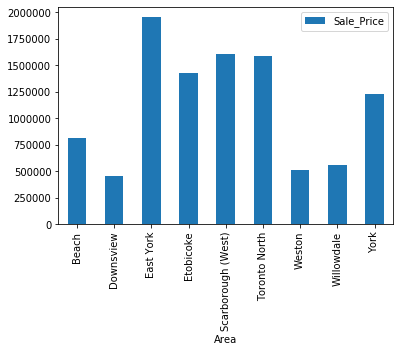

In [16]:
Price_sorted_df.plot(x ='Area', y='Sale_Price', kind = 'bar')